In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.shape

(244, 7)

Target Variable is tip and rests are features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

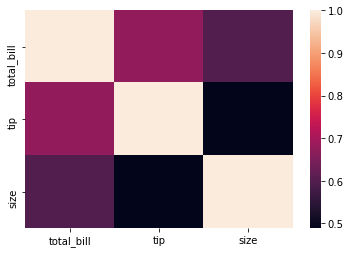

In [10]:
sns.heatmap(df.corr())

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
import pandas as pd 

In [14]:
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

In [18]:
cols = ['total_bill', 'size']

df1 = df.loc[:, cols]
vif_scores(df1)

,Independent Features,VIF Scores
0,total_bill,8.684373
1,size,8.684373


VIF = 1 → No correlation

VIF = 1 to 5 → Moderate correlation

VIF >10 → High correlation

---
over 0.9 of covariance or lower -0.9 covariance among independent features is bad. Meaning those columns having corr value is highly corelated and will do multi-collinearity. So remove any one of them and test again

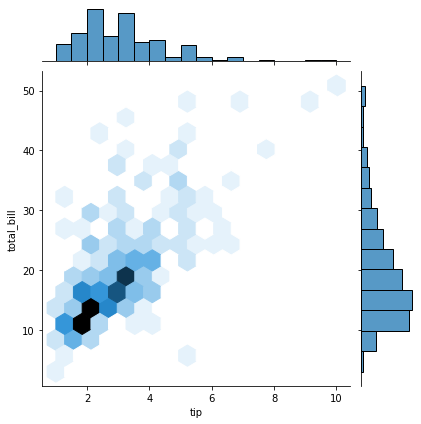

In [19]:
sns.jointplot(x='tip', y='total_bill', data=df, kind='hex')

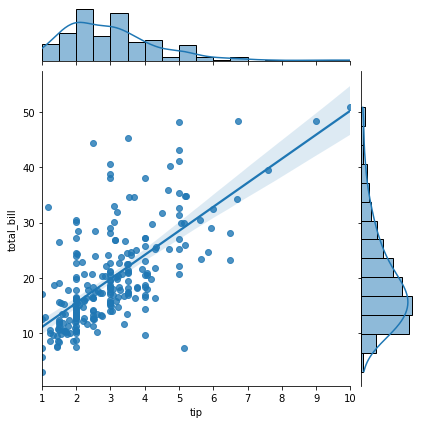

In [20]:
sns.jointplot(x='tip', y='total_bill', data=df, kind='reg')

apply joinplot when no of features are less (under 5) and plot each with target variable.

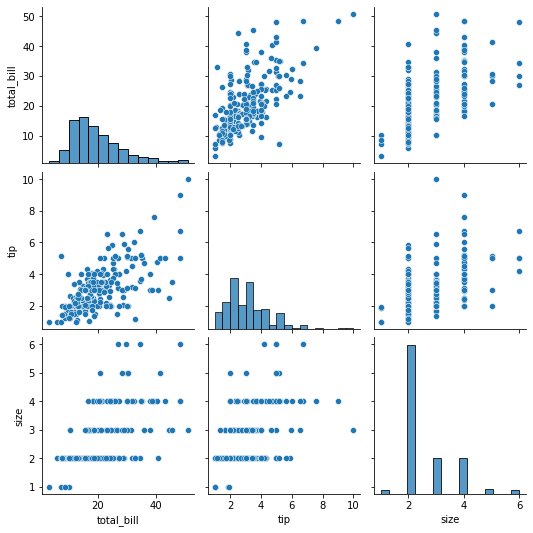

In [21]:
sns.pairplot(data=df)

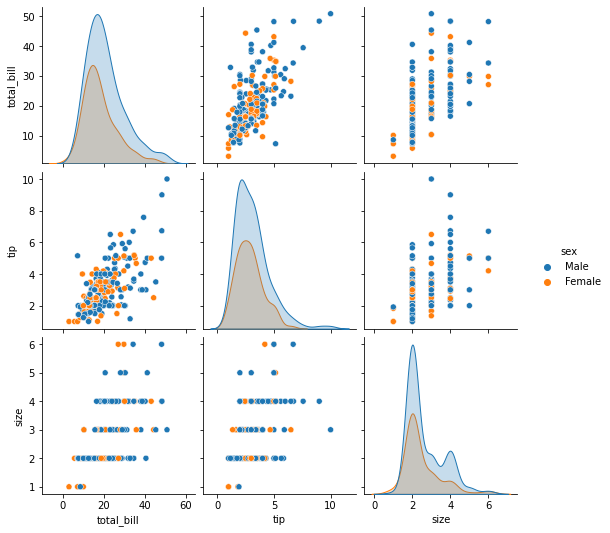

In [22]:
sns.pairplot(data=df, hue='sex')

C:\Users\Kaushik Pal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

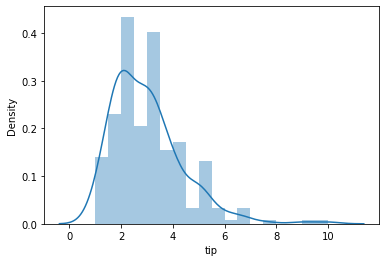

In [26]:
sns.distplot(df['tip'])

C:\Users\Kaushik Pal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip'>

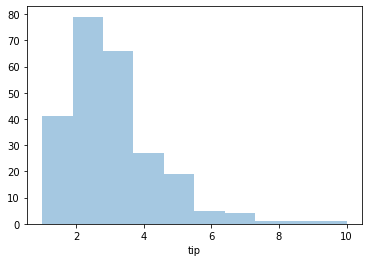

In [27]:
sns.distplot(df['tip'], kde=False, bins=10)

### Categorical Features

<AxesSubplot:xlabel='sex', ylabel='count'>

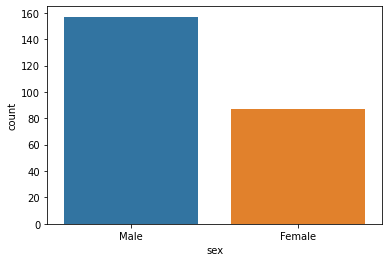

In [29]:
sns.countplot(x ='sex', data=df)

<AxesSubplot:xlabel='count', ylabel='sex'>

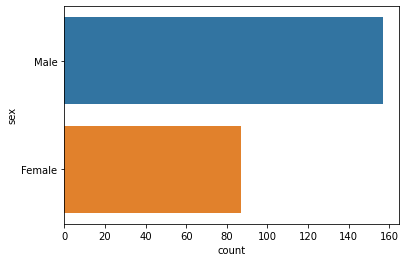

In [30]:
sns.countplot(y ='sex', data=df)

In [32]:
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='day', ylabel='count'>

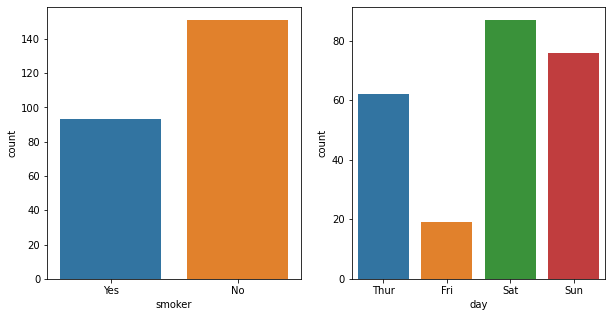

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.countplot(ax=ax[0], x ='smoker', data=df)
sns.countplot(ax=ax[1], x ='day', data=df)

<AxesSubplot:xlabel='total_bill', ylabel='sex'>

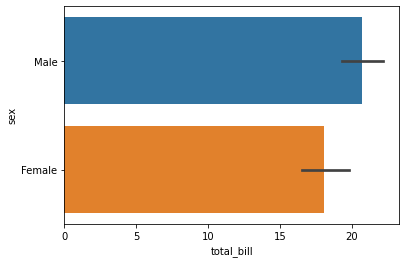

In [49]:
sns.barplot(x='total_bill', y='sex', data=df)

the black line is saying that values can be from tip of black line to bottom point of the black line. Normally ci=95 and it shows 95% distribution via back line

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

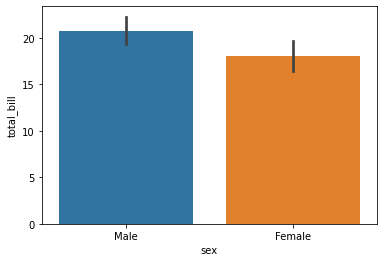

In [50]:
sns.barplot(y='total_bill', x='sex', data=df)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

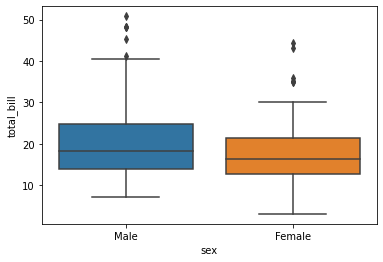

In [52]:
sns.boxplot(x='sex', y='total_bill', data=df)

each box represent values for each category.

See blue box, the middle line in the box is median line, where midean of that category lie. from median line above if 50% posotive and bellow of that line 50% negative. the box represent 25% above and 25% bellow values. Meaning there is high chance any male total_bill value exist in that blue box region. above the box the line represent extreme positive values and vice versa in below.

and the single points above or bellow line is outliers.

<AxesSubplot:>

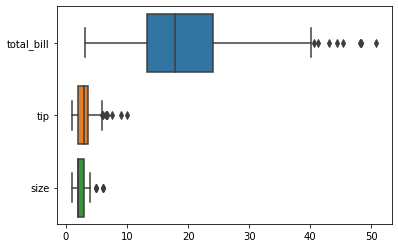

In [53]:
sns.boxplot(data=df, orient='h')

<AxesSubplot:xlabel='total_bill', ylabel='day'>

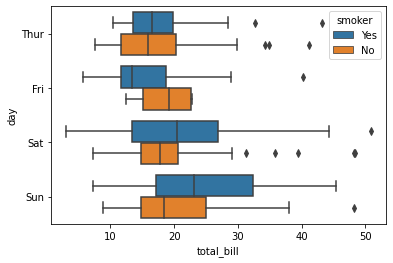

In [54]:
sns.boxplot(x='total_bill', y='day', hue='smoker', data=df)

<AxesSubplot:xlabel='total_bill', ylabel='day'>

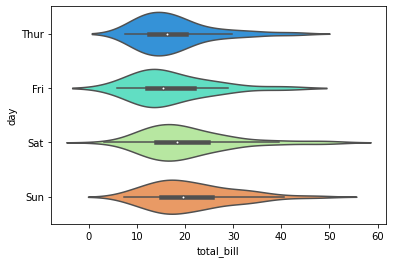

In [55]:
sns.violinplot(x='total_bill', y='day', data=df, palette='rainbow')

### IRIS dataSet

In [56]:
df_iris = sns.load_dataset('iris')

In [57]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

<AxesSubplot:>

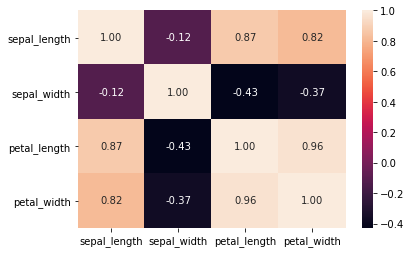

In [61]:
sns.heatmap(df_iris.corr(),annot=True, fmt='.2f')

In [65]:
vif_scores(df_iris.iloc[:, :-1])

,Independent Features,VIF Scores
0,sepal_length,262.969348
1,sepal_width,96.353292
2,petal_length,172.960962
3,petal_width,55.502060


very high VIF scores meaning multi-colinearity

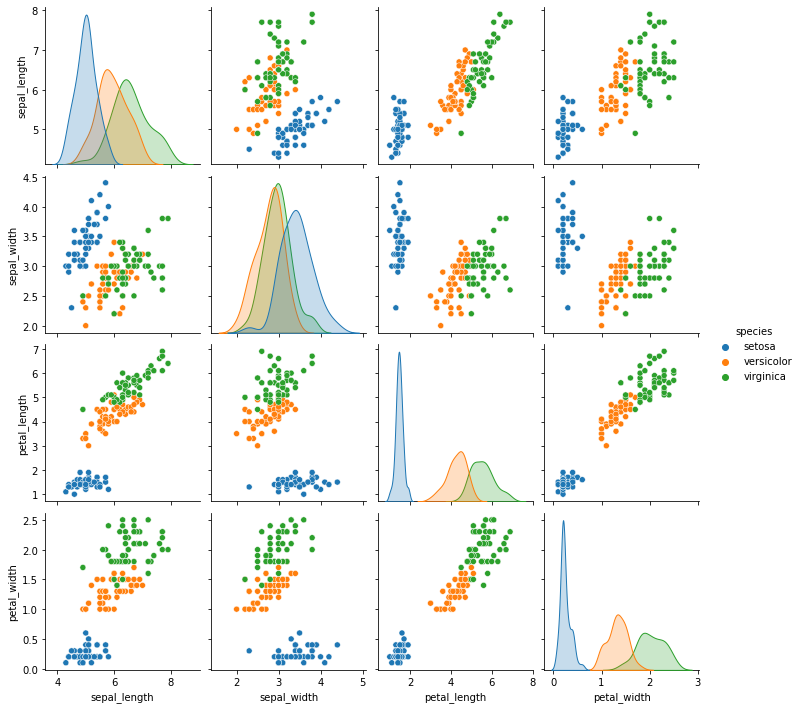

In [67]:
sns.pairplot(data=df_iris, hue='species')

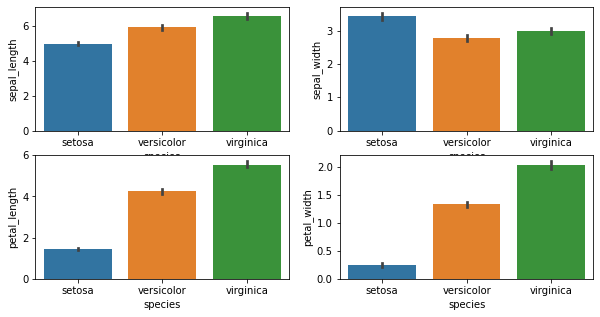

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))

for i in range(2):
    for j in range(2):
        index = 2*i +j
        sns.barplot(x='species', y=df_iris.iloc[:, index], data=df_iris,
                    ax=ax[i, j])

In [77]:
df_iris.groupby('species').agg('median').T

species,setosa,versicolor,virginica
sepal_length,5.0,5.90,6.50
sepal_width,3.4,2.80,3.00
petal_length,1.5,4.35,5.55
petal_width,0.2,1.30,2.00


In [72]:
df_iris.shape

(150, 5)

<AxesSubplot:xlabel='species', ylabel='count'>

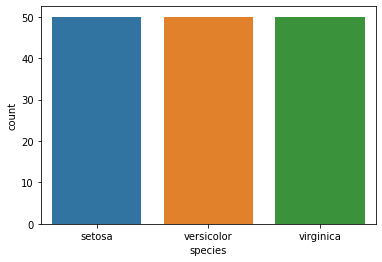

In [78]:
sns.countplot(x='species', data=df_iris)

C:\Users\Kaushik Pal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kaushik Pal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kaushik Pal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

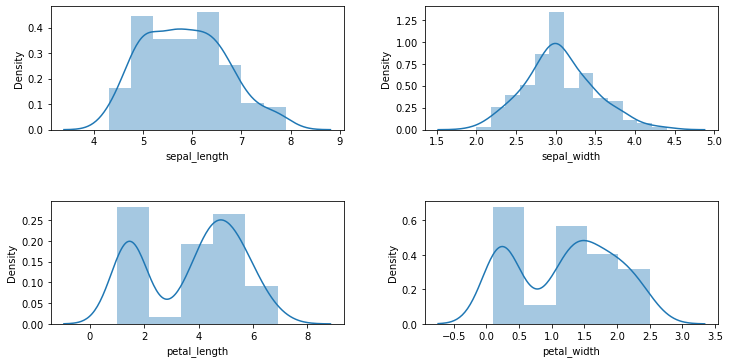

In [86]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
fig.tight_layout(h_pad=5, w_pad=5)

for i in range(2):
    for j in range(2):
        index = 2*i +j
        sns.distplot(df_iris.iloc[:, index], ax=ax[i, j])

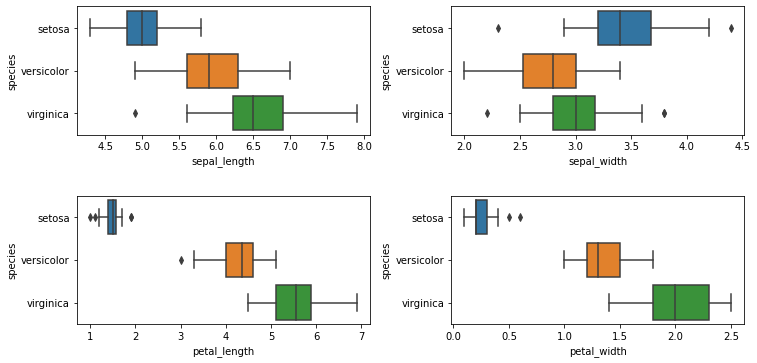

In [92]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
fig.tight_layout(h_pad=4, w_pad=5)

for i in range(2):
    for j in range(2):
        index = 2*i +j
        sns.boxplot(y='species', x=df_iris.iloc[:, index], data=df_iris,
                    ax=ax[i, j])

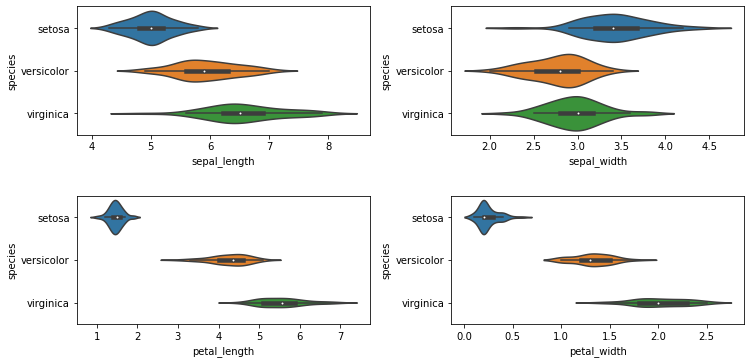

In [93]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
fig.tight_layout(h_pad=4, w_pad=5)

for i in range(2):
    for j in range(2):
        index = 2*i +j
        sns.violinplot(y='species', x=df_iris.iloc[:, index], data=df_iris,
                    ax=ax[i, j])

In [98]:
df_new = pd.DataFrame() 
df_new['columns'] = df_iris.columns
df_new['missing values'] = [sum(df_iris[x].isna()) for x in df_iris.columns]
df_new

,columns,missing values
0,sepal_length,0
1,sepal_width,0
2,petal_length,0
3,petal_width,0
4,species,0


In [100]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col='PassengerId')
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
df_titanic.shape

(891, 11)

In [116]:
df_new = pd.DataFrame() 
total_samples = df_titanic.shape[0]
df_new['columns'] = df_titanic.columns
df_new['missing values'] = [sum(df_titanic[x].isnull()) for x in df_titanic.columns]
df_new['percentage(%)'] = [round(df_new.iloc[x, 1]/total_samples * 100, 2) for x in range(len(df_new.index))]
df_new

,columns,missing values,percentage(%)
0,Survived,0,0.00
1,Pclass,0,0.00
2,Name,0,0.00
3,Sex,0,0.00
4,Age,177,19.87
5,SibSp,0,0.00
6,Parch,0,0.00
7,Ticket,0,0.00
8,Fare,0,0.00
9,Cabin,687,77.10


In [113]:
len(df_new.index)

11

<AxesSubplot:ylabel='PassengerId'>

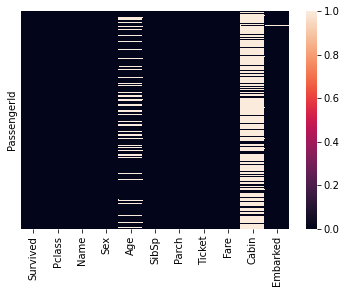

In [105]:
sns.heatmap(df_titanic.isnull(), yticklabels=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

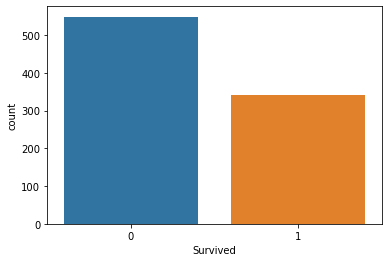

In [118]:
sns.countplot(x='Survived', data=df_titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

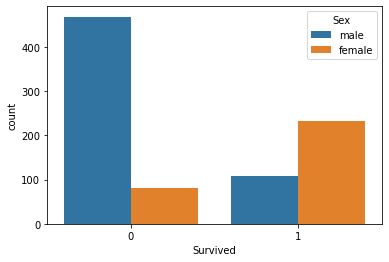

In [119]:
sns.countplot(x='Survived', hue='Sex', data=df_titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

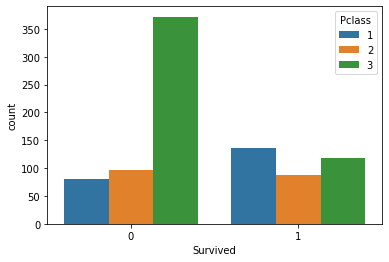

In [120]:
sns.countplot(x='Survived', hue='Pclass', data=df_titanic)

Pclass means passanger class in ship. 

1 = 1st class (rich niggga)

2 = 2nd class (middle class)

3 = 3rd class (poor 😢)

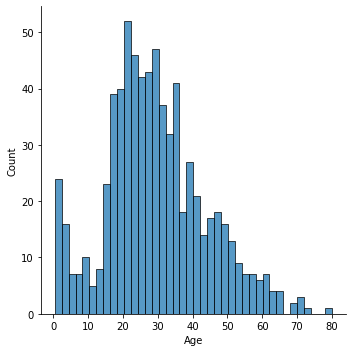

In [122]:
sns.displot(df_titanic['Age'].dropna(), bins=40)

C:\Users\Kaushik Pal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

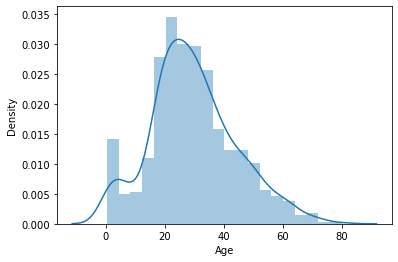

In [125]:
sns.distplot(df_titanic['Age'].dropna(), bins=20)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

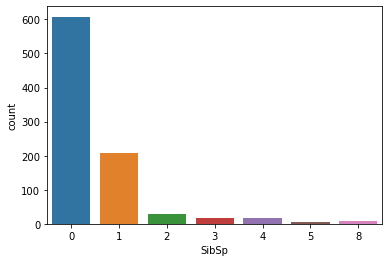

In [126]:
sns.countplot(x='SibSp', data=df_titanic)

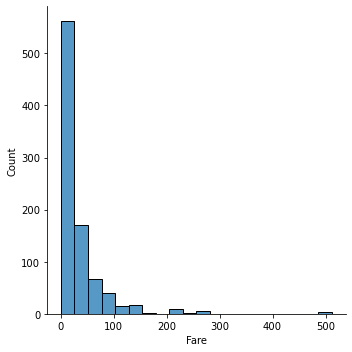

In [128]:
sns.displot(df_titanic['Fare'], bins=20)

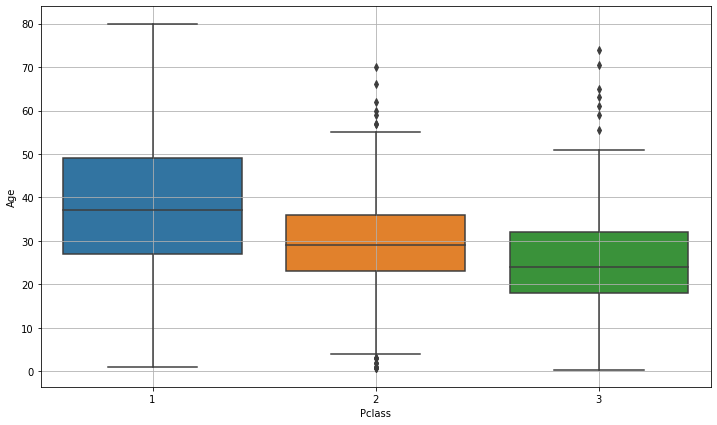

In [130]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=df_titanic)
plt.grid() 
plt.show()

In [140]:
import numpy as np 

In [132]:
df_titanic.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [150]:
median_ages = df_titanic.groupby('Pclass')['Age'].median()

def impute_cols(columns):
    age, Pclass = columns
    if pd.isna(age):
        return median_ages[Pclass]
    else:
        return age

In [151]:
df_titanic['Age'] = df_titanic[['Age', 'Pclass']].apply(impute_cols, axis=1)

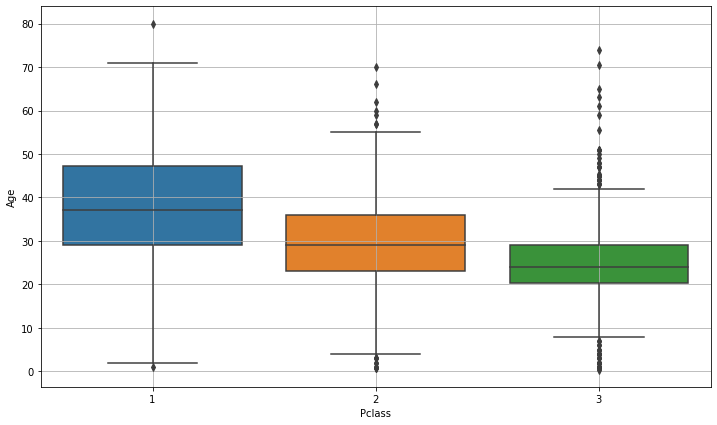

In [156]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=df_titanic)
plt.grid() 
plt.show()

<AxesSubplot:ylabel='PassengerId'>

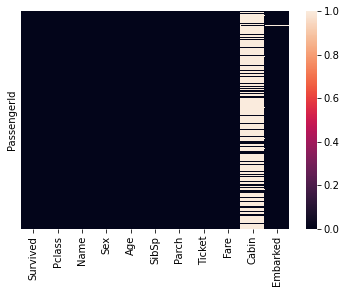

In [159]:
sns.heatmap(df_titanic.isnull(), yticklabels=False)

In [160]:
df_titanic['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
C22 C26        3
              ..
C32            1
C87            1
A19            1
B30            1
F E69          1
Name: Cabin, Length: 147, dtype: int64

In [162]:
df_titanic.drop(['Cabin'], axis=1, inplace=True)
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [163]:
df_titanic.dropna(inplace=True)

In [164]:
df_new = pd.DataFrame() 
total_samples = df_titanic.shape[0]
df_new['columns'] = df_titanic.columns
df_new['missing values'] = [sum(df_titanic[x].isnull()) for x in df_titanic.columns]
df_new['percentage(%)'] = [round(df_new.iloc[x, 1]/total_samples * 100, 2) for x in range(len(df_new.index))]
df_new

,columns,missing values,percentage(%)
0,Survived,0,0.0
1,Pclass,0,0.0
2,Name,0,0.0
3,Sex,0,0.0
4,Age,0,0.0
5,SibSp,0,0.0
6,Parch,0,0.0
7,Ticket,0,0.0
8,Fare,0,0.0
9,Embarked,0,0.0


In [166]:
df_titanic.drop(['Name', 'Ticket'],axis=1, inplace=True)

In [179]:
def dummy_col(df_titanic, col):
    df_titanic = pd.get_dummies(data=df_titanic, drop_first=True)
    return df_titanic

In [180]:
x = dummy_col(df_titanic, 'Embarked')
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,0
2,1,1,female,38.0,1,0,71.2833,0
3,1,3,female,26.0,0,0,7.9250,0
4,1,1,female,35.0,1,0,53.1000,0
5,0,3,male,35.0,0,0,8.0500,0


In [183]:
df_titanic = pd.get_dummies(data=df_titanic, columns=['Embarked', 'Sex'], drop_first=True, dtype='uint8')